# Лабораторная работа №4
# Статистическое моделирование функционирования системы с запасными элементами

## Постановка задачи

Рассматривается автоматизированная система, структурно-надежностная схема которой и ЛФРС известна. Система состоит из m различных по типу элементов, по каждому типу в схеме  ni  одинаковых элементов, и Li запасных частей (ЗЧ). Поток отказов элементов системы простейший, это означает, что время наработки до отказа подчиняется экспоненциальному закону с параметром λi. Система функционирует в режиме непрерывного длительного применения и в случае отказа, элемент заменяется на работоспособную запасную часть, если количество оставшихся ЗЧ больше нуля. Считаем, что замена происходит быстро и то время, за которое меняется элемент, не влияет на работоспособность системы. 

Требуется определить, используя метод статистического моделирования, какое минимальное количество ЗЧ необходимо, чтобы вероятность безотказной работы (ВБР) системы за время T была не менее P0. 

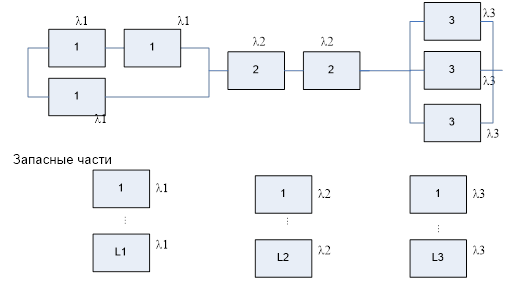

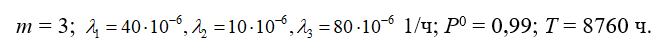

## Решение

Для начала определим количество реализаций N по формуле:
$$ N = t_{\alpha}^2 \frac{ P(1-P)}{\varepsilon^2}, $$ где $t_{\alpha}$ квантиль нормального распределения по уровню $\alpha$, Р - вероятность безотказной работы, $\varepsilon$ - относительная точность.

Для $\alpha = 0.99, \varepsilon = 0.001, t_{\alpha} = 2.33$. Подставим в формулу и получим $$ N = t_{\alpha}^2 \frac{ P(1-P)}{\varepsilon^2} = 53746 $$

Составим ЛФРС

$$ F = ((x_{0} \vee (x_{1} \wedge x_{2})) \wedge (x_{3} \wedge x_{4}) \wedge (x_{5} \vee x_{6} \vee x_{7})) $$

In [12]:
import numpy as np
import random

In [13]:
m = 3
l = [4e-5, 1e-5, 8e-5]
p0 = 0.99
t = 8760
els = [0] * 3
n = 53746

In [14]:
def exp_dist(b):
    u = random.random() + 1e-6
    return -np.log(u) / b

In [15]:
def lfrs(x):
    l = []
    for el in x:
        l.append(el > t)
    
    return (l[0] or (l[1] and l[2])) and l[3] and l[4] and (l[5] or l[6] or l[7])

In [16]:
def monte_karlo():
    d = 0
    num_of_els = [3, 2, 3]
    
    for i in range(n):
        x = []
        for j in range(m):
            tmp = []
            for k in range(num_of_els[j]):
                tmp.append(exp_dist(l[j]))
            for k in range(els[j]):
                tmp[tmp.index(min(tmp))] += exp_dist(l[j])
            for k in range(num_of_els[j]):
                x.append(tmp[k])
        if not lfrs(x):
            d += 1
    return 1 - d/n

In [25]:
els = [0, 0, 0]
while True:
    p = [0., 0., 0.]
    for i in range(len(els)):
        els[i] += 1
        p[i] = monte_karlo()
        els[i] -= 1
    els[p.index(max(p))] += 1
    if max(p) >= p0:
        print("Минимальное количество запчастей = ", sum(els))
        print("p = ", monte_karlo())
        print("els =", els)
        break

Минимальное количество запчастей =  8
p =  0.9908086183157816
els = [3, 2, 3]
